In [3]:
!python -V

Python 3.10.12


## Q1. Refactoring

Download all files from the [homework](https://github.com/jesusoviedo/mlops-zoomcamp-datatalksclub/tree/main/cohorts/2024/06-best-practices/homework) folder

In [6]:
!ls -l

total 504
-rw-rw-r-- 1 joviedo joviedo    252 Jul  2 23:55 Dockerfile
-rw-rw-r-- 1 joviedo joviedo    271 Jul  6 22:59 Pipfile
-rw-r--r-- 1 joviedo joviedo 140516 Jul  6 22:59 Pipfile.lock
-rw-rw-r-- 1 joviedo joviedo   3209 Jul  4 00:33 batch.py
-rw-rw-rw- 1 root    root    336205 Jul  6 23:07 homework_6.ipynb
-rw-rw-r-- 1 joviedo joviedo  17376 Jul  2 23:57 model.bin


Make the requested adjustments to the [batch.py](https://github.com/jesusoviedo/mlops-zoomcamp/blob/main/06-best-practice/homework_6/batch.py) file

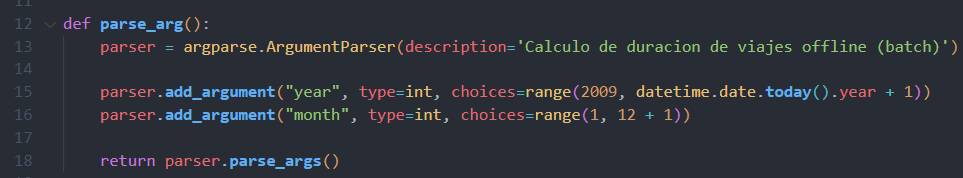


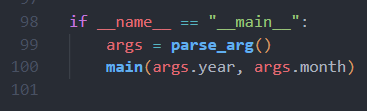


In [5]:
!python batch.py 2023 3

predicted mean duration: 14.203865642696083


In [6]:
!ls output/

'taxi_type=yellow_year=2023_month=03.parquet'


## Q2. Installing pytest

Run this command in the terminal
```
pipenv install --dev pytest
```

In [8]:
!ls -l

total 540
-rw-rw-r-- 1 joviedo joviedo    252 Jul  2 23:55 Dockerfile
-rw-rw-r-- 1 joviedo joviedo    271 Jul  7 13:40 Pipfile
-rw-r--r-- 1 joviedo joviedo 140516 Jul  6 22:59 Pipfile.lock
drwxr-xr-x 2 root    root      4096 Jul  6 23:17 artifacts
-rw-rw-r-- 1 joviedo joviedo   3078 Jul  6 23:24 batch.py
-rw-rw-rw- 1 root    root    382943 Jul  7 13:42 homework_6.ipynb
drwxrwxrwx 2 root    root      4096 Jul  6 23:34 output
drwxrwxr-x 3 joviedo joviedo   4096 Jul  3 00:38 tests


Create the [test_batch.py](https://github.com/jesusoviedo/mlops-zoomcamp/blob/main/06-best-practice/homework_6/tests/test_batch.py) and [__init__.py](https://github.com/jesusoviedo/mlops-zoomcamp/blob/main/06-best-practice/homework_6/tests/__init__.py) file

In [10]:
!ls -l tests/

total 4
-rw-rw-r-- 1 joviedo joviedo    0 Jul  3 00:20 __init__.py
-rw-rw-r-- 1 joviedo joviedo 1262 Jul  3 01:19 test_batch.py


## Q3. Writing first unit test

Make the requested modifications to the file [test_batch.py](https://github.com/jesusoviedo/mlops-zoomcamp/blob/main/06-best-practice/homework_6/tests/test_batch.py)

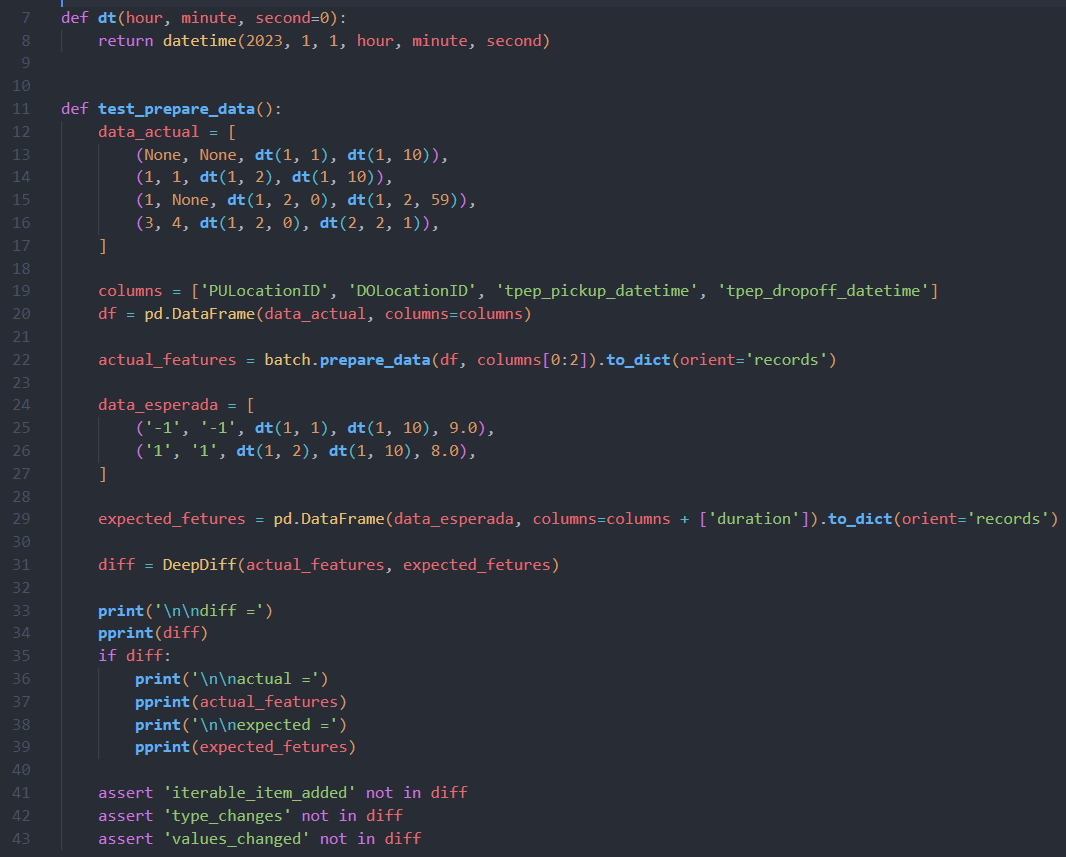

Run this command in the terminal

Run pytest
```
pipenv run pytest tests
```

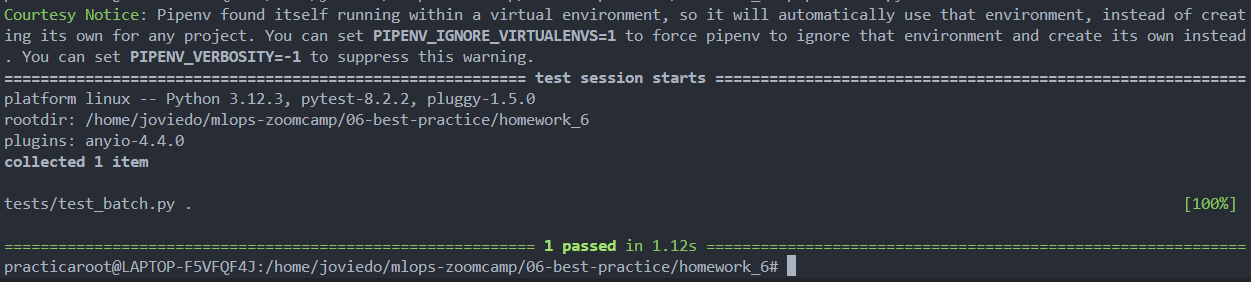

## Q4. Mocking S3 with Localstack

Create the [docker-compose.yam](https://github.com/jesusoviedo/mlops-zoomcamp/blob/main/06-best-practice/homework_6/integraton-test/docker-compose.yaml) file

In [6]:
! ls -l integration-test

total 4
-rw-rw-r-- 1 root root 116 Jul  3 08:53 docker-compose.yaml


In [9]:
!cat integration-test/docker-compose.yaml

services:
  s3:
    image: localstack/localstack
    ports:
      - "4566:4566"
    environment:
      - SERVICES=s3

Run this command in the terminal

```
docker compose up -d
```

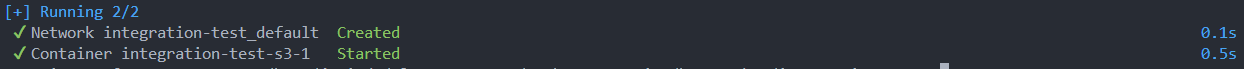

Run this command in the terminal

```
export AWS_ACCESS_KEY_ID="abc"
export AWS_SECRET_ACCESS_KEY="xyz"
export AWS_DEFAULT_REGION="eu-west-1"

aws --endpoint-url=http://localhost:4566 s3 mb s3://nyc-duration
aws --endpoint-url=http://localhost:4566 s3 ls
```

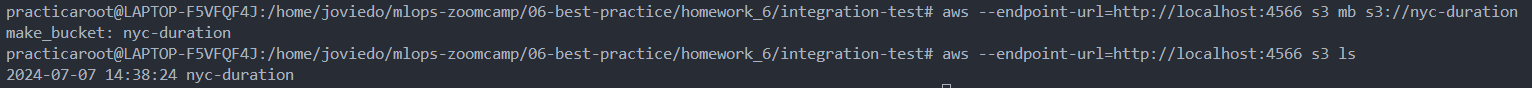

Make the requested modifications to the [batch.py](https://github.com/jesusoviedo/mlops-zoomcamp/blob/main/06-best-practice/homework_6/batch.py) file

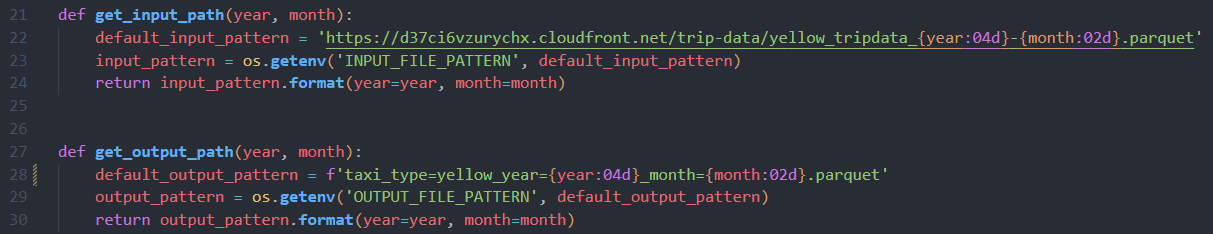

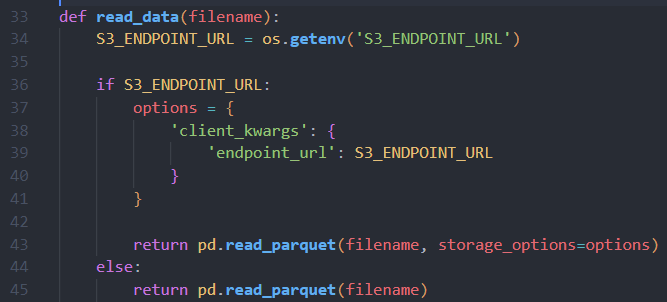

## Q5. Creating test data

Create the [integration_test.py](https://github.com/jesusoviedo/mlops-zoomcamp/blob/main/06-best-practice/homework_6/integraton-test/integration_test.py) file

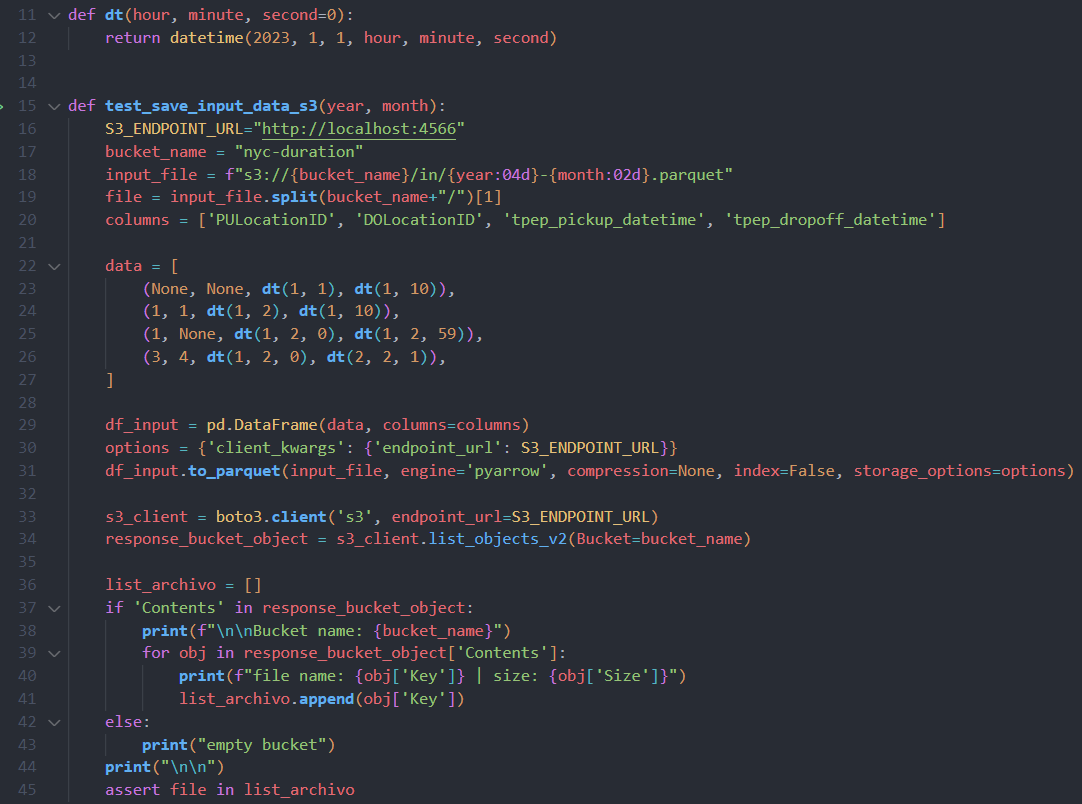

Run this command in the terminal

```
python integration_test.py
```

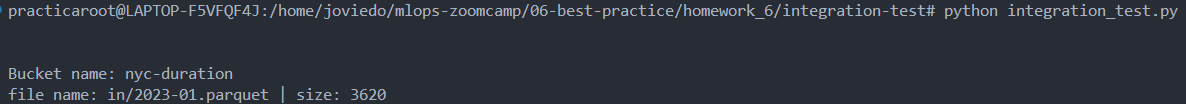

Run this command in the terminal

```
aws --endpoint-url=http://localhost:4566 s3 ls nyc-duration/in/
```

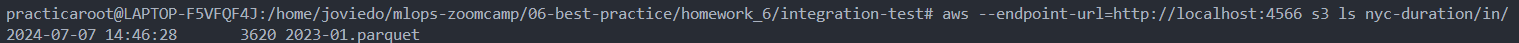

## Q6. Finish the integration test

Make the requested modifications to the [batch.py](https://github.com/jesusoviedo/mlops-zoomcamp/blob/main/06-best-practice/homework_6/batch.py) file

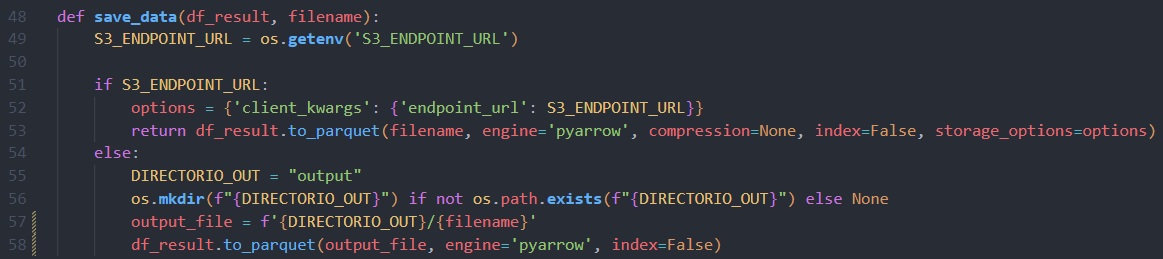

Make the requested modifications to the [integration_test.py](https://github.com/jesusoviedo/mlops-zoomcamp/blob/main/06-best-practice/homework_6/integraton-test/integration_test.py) file

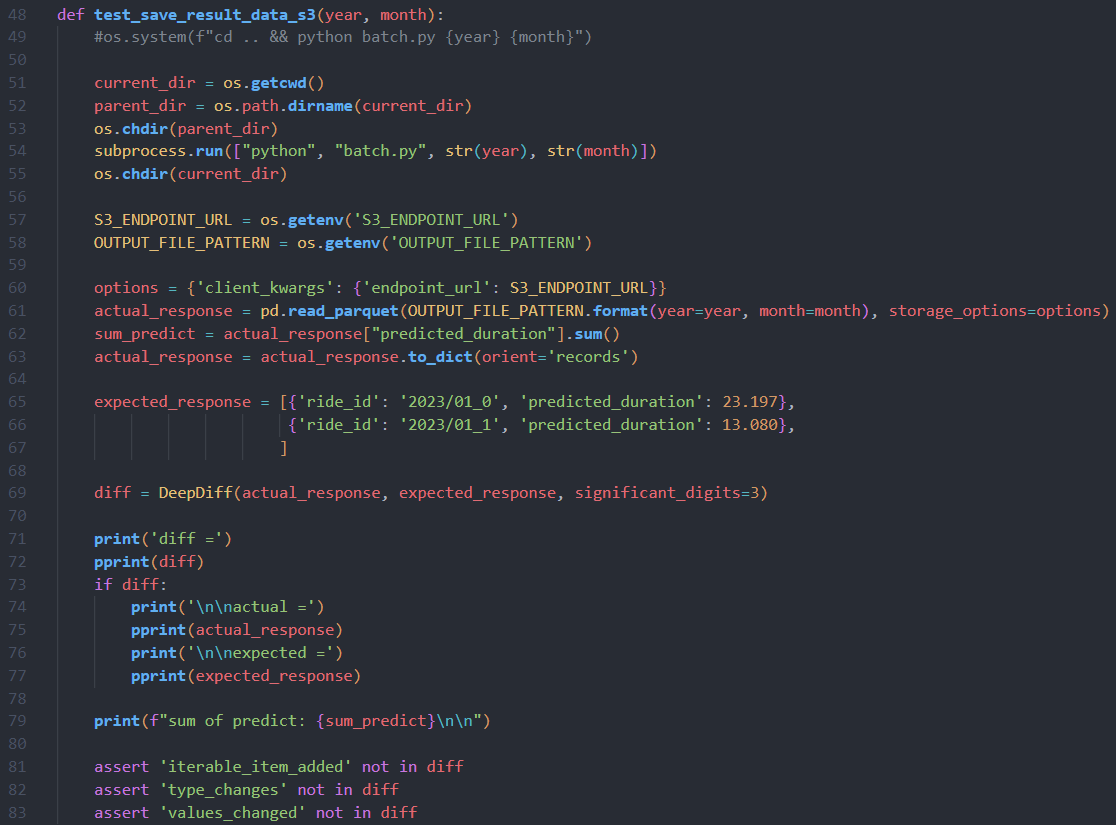

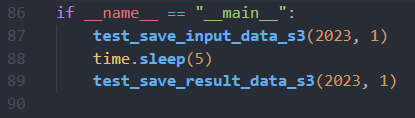

Run this command in the terminal

```
export S3_ENDPOINT_URL="http://localhost:4566"
export INPUT_FILE_PATTERN="s3://nyc-duration/in/{year:04d}-{month:02d}.parquet"
export OUTPUT_FILE_PATTERN="s3://nyc-duration/out/{year:04d}-{month:02d}.parquet"


python integration_test.py
```

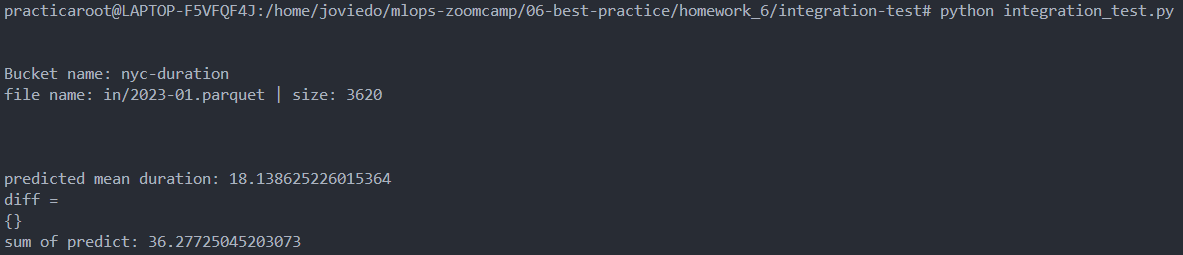


Create run.sh

In [11]:
!cat integration-test/run.sh

#!/usr/bin/env bash

export AWS_ACCESS_KEY_ID="abc"
export AWS_SECRET_ACCESS_KEY="xyz"
export AWS_DEFAULT_REGION="eu-west-1"
export S3_ENDPOINT_URL="http://localhost:4566"
export INPUT_FILE_PATTERN="s3://nyc-duration/in/{year:04d}-{month:02d}.parquet"
export OUTPUT_FILE_PATTERN="s3://nyc-duration/out/{year:04d}-{month:02d}.parquet"

docker-compose up -d
sleep 4

aws --endpoint-url=${S3_ENDPOINT_URL} s3 mb s3://nyc-duration
sleep 4

pipenv run python integration_test.py
sleep 4

ERROR_CODE=$?
if [ ${ERROR_CODE} != 0 ]; then
    docker-compose logs
    docker-compose down
    exit ${ERROR_CODE}
fi

docker-compose down

Run this command in the terminal

```
. run.sh
```

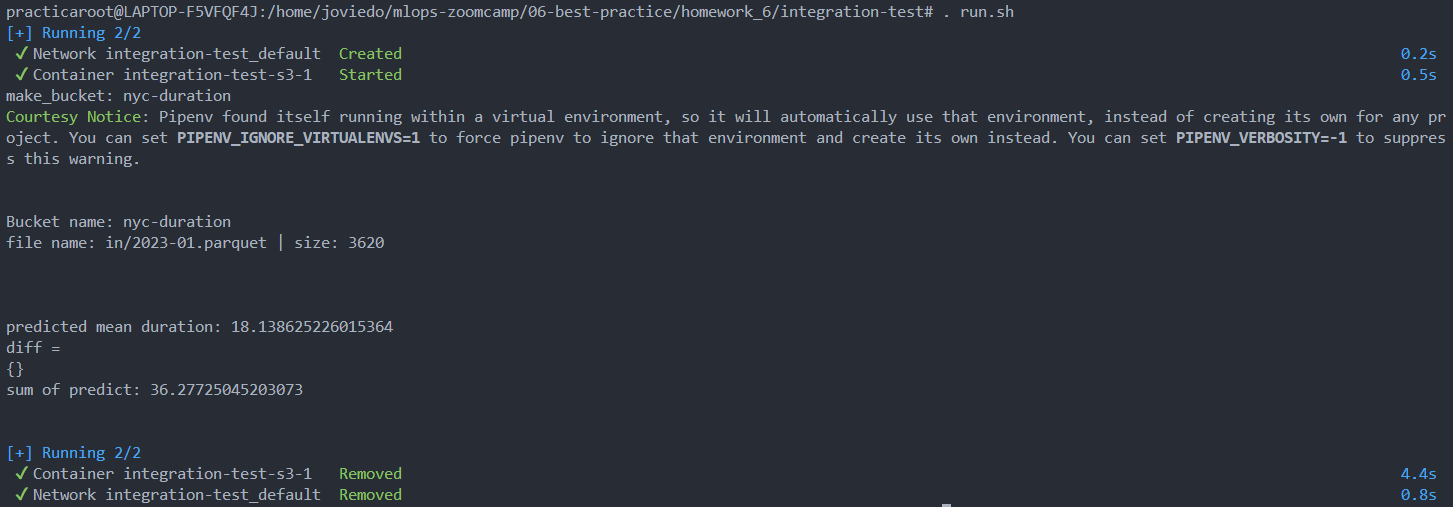